<a href="https://colab.research.google.com/github/joaochenriques/MCTE_2022/blob/main/Tides/StandingWaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pathlib
if not pathlib.Path("mpl_utils.py").exists():
  !curl -O https://raw.githubusercontent.com/joaochenriques/MCTE_2022/main/libs/mpl_utils.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2018  100  2018    0     0   4827      0 --:--:-- --:--:-- --:--:--  4839


In [2]:
import matplotlib.pyplot as mpl
import numpy as np
import mpl_utils as mut
mut.config_plot()

%config InlineBackend.figure_formats = ['svg']

Velocity field

In [3]:
def velocity( t, y, x, A, k, ω, λ, h ):
    g  = 9.81
    
    aa = A * g * k / ω

    ax = aa * np.cosh( k*(y+h) ) / np.cosh( k*h )
    ay = aa * np.sinh( k*(y+h) ) / np.cosh( k*h )

    ux = ax * np.cos( k*x - ω*t )
    uy = ay * np.sin( k*x - ω*t )
    
    return ( ux, uy ) 

Wave height for a standing wave

In [4]:
def ζ( t, x, A, k, ω ):
    return 2.0 * A * np.cos( k*x ) * np.cos( ω*t )

Configure the test case

In [5]:
π = np.pi
g = 9.81

A = 0.05
h = 0.50
L = 20.0

λ = L
k = 2 * π / λ
ω = np.sqrt( g * k * np.tanh(k*h) )
T = 2 * π / ω

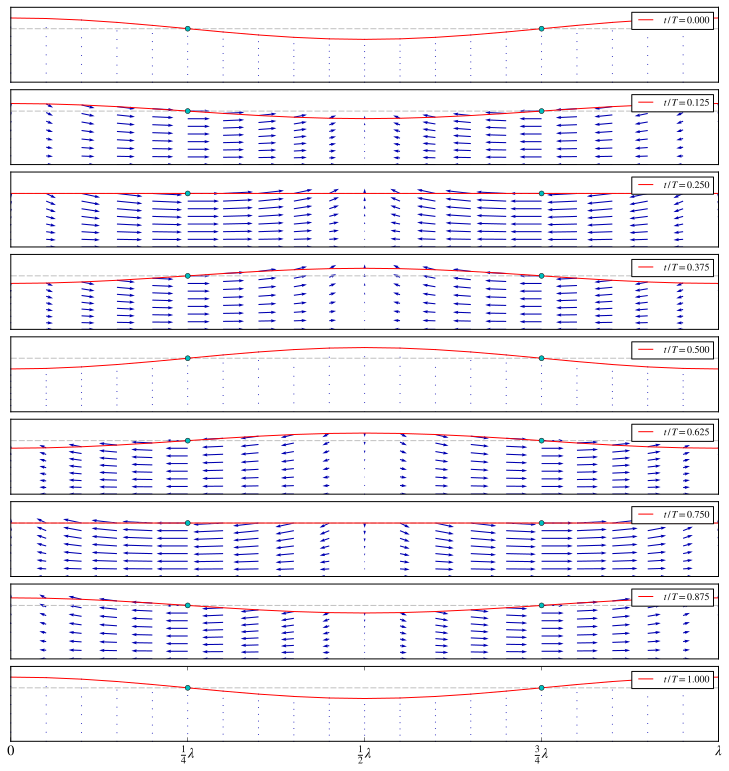

In [45]:
t_space = np.linspace( 0, T, 9 )
x_space = np.linspace( 0, L, 21 )

rows = len(t_space)

mpl.rcParams["figure.figsize"] = (12,1.4*rows)

fig, axs =mpl.subplots( rows, 1 )
fig.subplots_adjust(hspace=0.1)

s_space = np.linspace( 0.0, 1.0, 8 )

for i, t in enumerate( t_space ):

    # mean water level
    axs[i].plot( (0,1), (0,0), dashes=(6,2), color='#C0C0C0' )

    # plot free surface
    axs[i].plot( x_space/L, ζ( t, x_space, A, k, ω ), 'r-', label = '$t\,/\,T=%.3f$'%(t/T) )

    # plot velocity vectors
    for s in s_space:
        y = ζ( t, x_space, A, k, ω )    
        ys_space = y*s - h*(1-s)
        
        uxp, uyp = velocity( t, ys_space, x_space, A, +k, ω, λ, h ) # plus k
        uxm, uym = velocity( t, ys_space, x_space, A, -k, ω, λ, h ) # minus k
        ux = uxp + uxm
        uy = uyp + uym

        axs[i].quiver( x_space/L, ys_space, ux, uy, color='#0000B0', \
                       width=0.0015, scale=10, zorder=-2)

    # plot nodes with a cyan marker 
    axs[i].plot( (0.25,0.75), (0,0), 'co' )

    axs[i].set_ylim( (-h,4*A) )
    
    if i+1 < rows: 
      axs[i].xaxis.set_visible(False)
    else:
      axs[i].set_xticks( [0.00,0.25,0.50,0.75,1.00])
      axs[i].set_xticklabels( labels=[r'$0$',r'$\frac{1}{4}\lambda$', \
                                      r'$\frac{1}{2}\lambda$', \
                                      r'$\frac{3}{4}\lambda$',r'$\lambda$'])

    axs[i].yaxis.set_visible(False)

    axs[i].legend(fontsize=10)

fig.savefig( 'StandingWave.pdf', bbox_inches='tight' )
fig.savefig( 'StandingWave.svg', bbox_inches='tight' )

In [15]:

np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])